(400, 2) (400,)
[1.         1.         1.         1.         0.98333333]
0.99


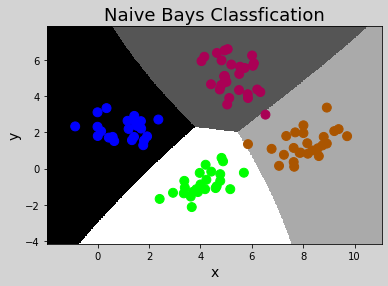

In [3]:
#训练集与测试集划分
import numpy as np
import sklearn.naive_bayes as nb
import matplotlib.pyplot as mp

data=np.loadtxt('../ml_data/multiple1.txt',delimiter=',')
x=data[:,:2].astype('f8')
y=data[:,-1].astype('f8')
print(x.shape,y.shape)

#划分数据集
import sklearn.model_selection as ms
train_x,test_x,train_y,test_y=\
    ms.train_test_split(x,y,test_size=0.25,random_state=7)
#   输入集，输出集 测试集比例  随机种子

#交叉验证，看一下准确度
model=nb.GaussianNB()
ac_score=ms.cross_val_score(model,train_x,train_y,cv=5,scoring='accuracy')
print(ac_score.mean())   #交叉验证的准确度得分
#构建高斯朴素贝叶斯模型
model.fit(train_x,train_y)

#模型的预测效果
pred_test_y=model.predict(test_x)
acc=(test_y==pred_test_y).sum()/test_y.size
print(acc)  #accuracy精度

#绘制分类边界线
n=500
l,r=x[:,0].min()-1,x[:,0].max()+1
b,t=x[:,1].min()-1,x[:,1].max()+1
grid_x,grid_y=np.meshgrid(np.linspace(l,r,n),np.linspace(b,t,n))

mesh_x=np.column_stack((grid_x.ravel(),grid_y.ravel()))
mesh_z=model.predict(mesh_x)
grid_z=mesh_z.reshape(grid_x.shape)

mp.figure('Naive Bays Classfication',facecolor='lightgray')
mp.title('Naive Bays Classfication',fontsize=18)
mp.xlabel('x',fontsize=14)
mp.ylabel('y',fontsize=14)
mp.tick_params(labelsize=10)  #params参数
mp.pcolormesh(grid_x,grid_y,grid_z,cmap='gray')
mp.scatter(test_x[:,0],test_x[:,1],c=test_y,cmap='brg',s=80)
mp.show()
